# Predict Next Play

In [14]:
%matplotlib inline

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
raw_data_set = pd.read_csv("../resources/plays.csv")

In [3]:
raw_data_set.head(5)

,_00,_01,_02,_10,_11,_12,_20,_21,_22,play,result
0,1,1,0,0,0,0,0,0,0,_01,WINNER
1,1,1,1,1,0,0,0,0,0,_02,WINNER
2,1,1,0,0,0,0,0,0,0,_01,LOSER
3,1,1,1,1,0,0,0,0,0,_02,LOSER
4,1,0,0,0,1,0,0,0,0,_00,LOSER


In [4]:
raw_data_set.describe()

,_00,_01,_02,_10,_11,_12,_20,_21,_22
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.500000,0.548780,0.304878,0.597561,0.609756,0.182927,0.073171,0.134146,0.268293
std,0.501531,0.499139,0.461766,0.491891,0.489299,0.387791,0.261214,0.341853,0.444428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
winners = raw_data_set.drop(raw_data_set[raw_data_set['result'] != "WINNER"].index)
winners = winners.drop("result", axis=1)
winners.head()

,_00,_01,_02,_10,_11,_12,_20,_21,_22,play
0,1,1,0,0,0,0,0,0,0,_01
1,1,1,1,1,0,0,0,0,0,_02
7,1,0,0,0,1,0,0,0,0,_00
8,1,0,1,0,1,0,1,0,0,_20
9,1,1,1,1,1,0,1,0,0,_10


In [6]:
X = winners.drop("play", axis=1)
X.head()

,_00,_01,_02,_10,_11,_12,_20,_21,_22
0,1,1,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0
7,1,0,0,0,1,0,0,0,0
8,1,0,1,0,1,0,1,0,0
9,1,1,1,1,1,0,1,0,0


In [8]:
Y = winners["play"]
categories = Y.astype('category')

Y = categories.cat.codes
categories = categories.unique()
Y.head()

0    1
1    2
7    0
8    6
9    3
dtype: int8

In [16]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
prediction = clf.predict_proba([[1,1,0,0,0,0,0,0,0]])[0]
# categories[prediction]
prediction

array([0.        , 0.66666667, 0.        , 0.        , 0.33333333,
       0.        , 0.        , 0.        , 0.        ])

In [11]:
categories

[_01, _02, _00, _20, _10, _12, _22, _21, _11]
Categories (9, object): [_01, _02, _00, _20, ..., _12, _22, _21, _11]

[Text(154.18421052631578, 199.32, 'X[4] <= 0.5\ngini = 0.831\nsamples = 78\nvalue = [13, 2, 9, 3, 18, 4, 10, 1, 18]'),
 Text(59.47105263157895, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.645\nsamples = 32\nvalue = [5, 2, 2, 1, 18, 1, 0, 1, 2]'),
 Text(35.242105263157896, 126.83999999999999, 'X[8] <= 0.5\ngini = 0.444\nsamples = 21\nvalue = [4, 0, 0, 0, 15, 0, 0, 0, 2]'),
 Text(26.431578947368422, 90.6, 'X[7] <= 0.5\ngini = 0.405\nsamples = 20\nvalue = [3, 0, 0, 0, 15, 0, 0, 0, 2]'),
 Text(17.621052631578948, 54.359999999999985, 'X[3] <= 0.5\ngini = 0.438\nsamples = 18\nvalue = [3, 0, 0, 0, 13, 0, 0, 0, 2]'),
 Text(8.810526315789474, 18.119999999999976, 'gini = 0.571\nsamples = 7\nvalue = [2, 0, 0, 0, 4, 0, 0, 0, 1]'),
 Text(26.431578947368422, 18.119999999999976, 'gini = 0.314\nsamples = 11\nvalue = [1, 0, 0, 0, 9, 0, 0, 0, 1]'),
 Text(35.242105263157896, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0, 0, 0, 0]'),
 Text(44.05263157894737, 90.6, 'gini = 0.0\nsam

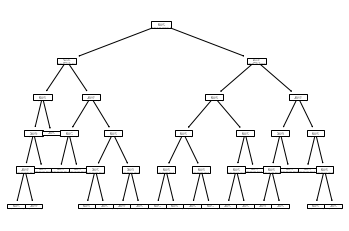

In [18]:
plot_tree(clf)